In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set theme for plots
sns.set(style="whitegrid")


In [4]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first few rows
df.head()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# STEP 3: Preprocessing the Data

In [5]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values (caused by empty TotalCharges) with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# MultipleLines has "No phone service", we treat it as "No"
df['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

# Internet related columns
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    df[col].replace({'No internet service': 'No'}, inplace=True)

# Encode remaining categoricals using get_dummies
df = pd.get_dummies(df, drop_first=True)

# Standardize numerical columns
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Final shape
print("Final dataset shape:", df.shape)


Final dataset shape: (7043, 24)


In [ ]:
# STEP 4: Train/Test Split

In [6]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (5634, 23)
Test set size: (1409, 23)


In [ ]:
# STEP 5: Logistic Regression

In [7]:
# # Initialize the model
# log_model = LogisticRegression()

# # Train the model
# log_model.fit(X_train, y_train)

# # Predict on test data
# y_pred_log = log_model.predict(X_test)

# # Evaluate
# print(" Logistic Regression Evaluation Metrics:\n")
# print(confusion_matrix(y_test, y_pred_log))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
# print("Accuracy Score:", accuracy_score(y_test, y_pred_log))

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Grid Search with 5-fold cross-validation
grid_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

# Best model
best_log_model = grid_log.best_estimator_
y_pred_log_tuned = best_log_model.predict(X_test)

# Evaluation
print("Logistic Regression (Tuned) Evaluation:\n")
print("Best Parameters:", grid_log.best_params_)
print(confusion_matrix(y_test, y_pred_log_tuned))
print(classification_report(y_test, y_pred_log_tuned))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_tuned))


Logistic Regression (Tuned) Evaluation:

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
[[934 102]
 [152 221]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Accuracy Score: 0.8197303051809794


In [ ]:
# STEP 6: Random Forest Classifier

In [8]:
# Initialize Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# rf_model.fit(X_train, y_train)

# # Predict on test set
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate
# print(" Random Forest Evaluation Metrics:\n")
# print(confusion_matrix(y_test, y_pred_rf))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
# print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train on training set
grid_rf.fit(X_train, y_train)

# Get best model
best_rf_model = grid_rf.best_estimator_

# Predict on test set
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate
print("Random Forest (Tuned) Evaluation:\n")
print("Best Parameters:", grid_rf.best_params_)
print(confusion_matrix(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest (Tuned) Evaluation:

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
[[949  87]
 [188 185]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy Score: 0.8048261178140526


In [ ]:
# STEP 7: Support Vector Machine (SVM)

In [9]:
# Initialize Support Vector Classifier
# svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# # Train the model
# svm_model.fit(X_train, y_train)

# # Predict on test set
# y_pred_svm = svm_model.predict(X_test)

# # Evaluate
# print("SVM Evaluation Metrics:\n")
# print(confusion_matrix(y_test, y_pred_svm))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
# print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_svm.fit(X_train, y_train)

# Get best model
best_svm_model = grid_svm.best_estimator_

# Predict on test data
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Evaluate
print("SVM (Tuned) Evaluation:\n")
print("Best Parameters:", grid_svm.best_params_)
print(confusion_matrix(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm_tuned))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVM (Tuned) Evaluation:

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
[[956  80]
 [179 194]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.71      0.52      0.60       373

    accuracy                           0.82      1409
   macro avg       0.78      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409

Accuracy Score: 0.8161816891412349


In [ ]:
# Cross-Validation for All 3 Models

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
cv_log = cross_val_score(best_log_model, X, y, cv=5)
print("Logistic Regression CV Mean Accuracy:", cv_log.mean())

# Random Forest
cv_rf = cross_val_score(best_rf_model, X, y, cv=5)
print("Random Forest CV Mean Accuracy:", cv_rf.mean())

# SVM
cv_svm = cross_val_score(best_svm_model, X, y, cv=5)
print("SVM CV Mean Accuracy:", cv_svm.mean())


Logistic Regression CV Mean Accuracy: 0.8036360208723142
Random Forest CV Mean Accuracy: 0.8046300366152656
SVM CV Mean Accuracy: 0.7990910703916382


In [ ]:
# Step 8: Results Summary & Comparison

In [ ]:
# Feature Importance (Random Forest)

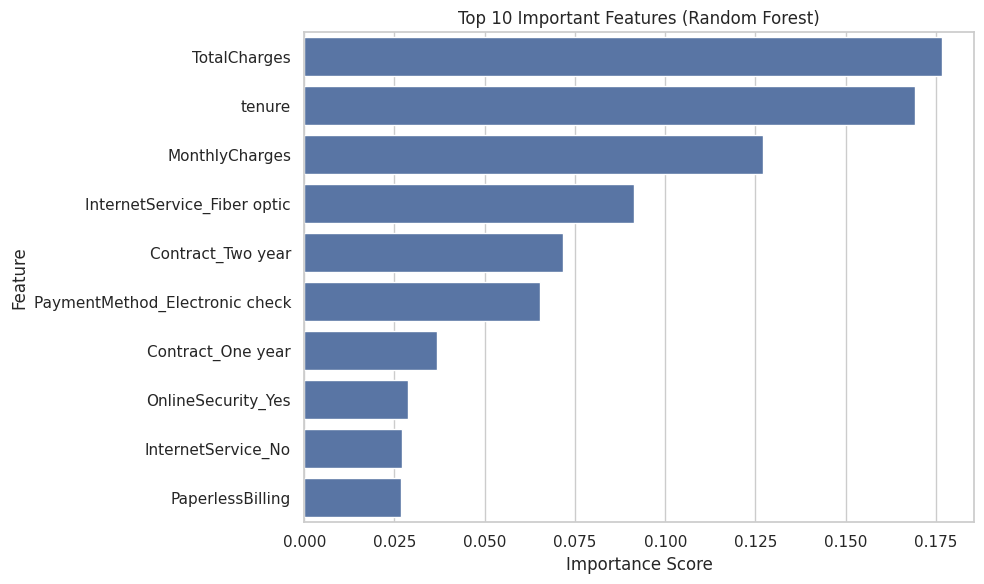

In [ ]:
# Feature importance from best Random Forest model
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create Series and sort
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances[:10], y=forest_importances.index[:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


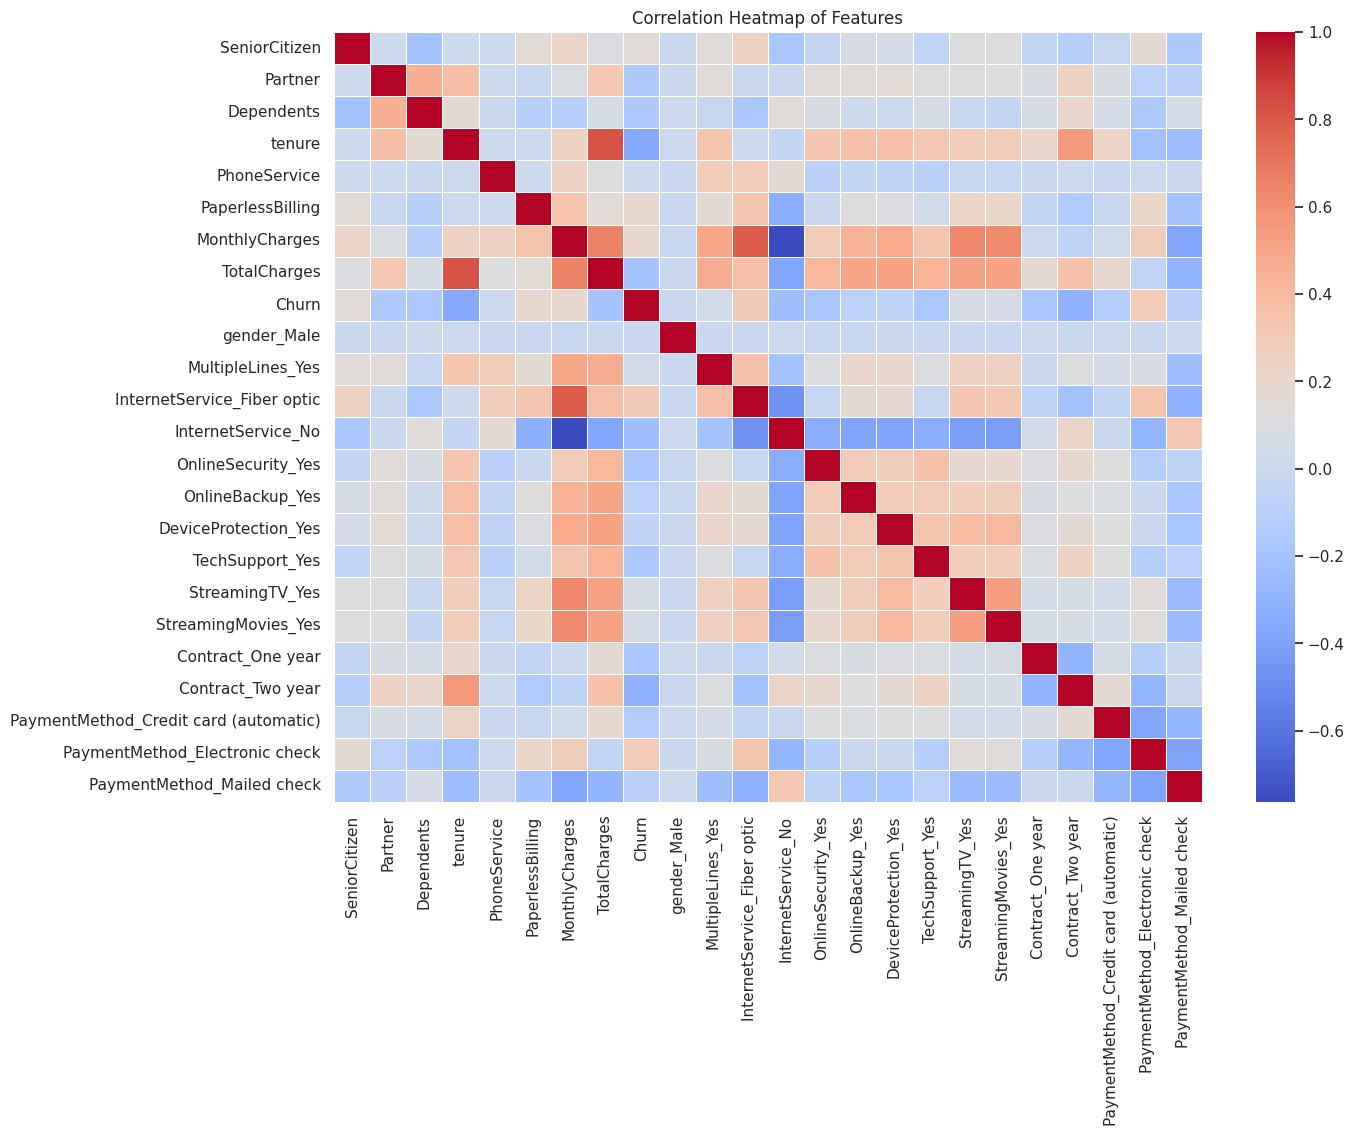

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
# SMOTE – Handle Class Imbalance

In [10]:
!pip install imbalanced-learn

In [ ]:
#  Resample the Dataset

In [11]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to full dataset before splitting
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

# Re-split data after SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Before SMOTE: Churn
0    5174
1    1869
Name: count, dtype: int64
After SMOTE: Churn
0    5174
1    5174
Name: count, dtype: int64


In [ ]:
# Retrain Logistic Regression Model

In [12]:
# Train best logistic model on resampled data
best_log_model.fit(X_train_sm, y_train_sm)
y_pred_log_smote = best_log_model.predict(X_test_sm)

# Evaluate
print("Logistic Regression (with SMOTE):\n")
print(confusion_matrix(y_test_sm, y_pred_log_smote))
print(classification_report(y_test_sm, y_pred_log_smote))
print("Accuracy Score:", accuracy_score(y_test_sm, y_pred_log_smote))


Logistic Regression (with SMOTE):

[[792 229]
 [184 865]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1021
           1       0.79      0.82      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Accuracy Score: 0.8004830917874396


In [ ]:
# SMOTE with Random Forest

In [13]:
# Train best random forest model on SMOTE data
best_rf_model.fit(X_train_sm, y_train_sm)
y_pred_rf_smote = best_rf_model.predict(X_test_sm)

# Evaluate
print("Random Forest (with SMOTE):\n")
print(confusion_matrix(y_test_sm, y_pred_rf_smote))
print(classification_report(y_test_sm, y_pred_rf_smote))
print("Accuracy Score:", accuracy_score(y_test_sm, y_pred_rf_smote))


Random Forest (with SMOTE):

[[803 218]
 [149 900]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Accuracy Score: 0.8227053140096618


In [ ]:
# SMOTE with SVM

In [14]:
# Train best SVM model on SMOTE data
best_svm_model.fit(X_train_sm, y_train_sm)
y_pred_svm_smote = best_svm_model.predict(X_test_sm)

# Evaluate
print("SVM (with SMOTE):\n")
print(confusion_matrix(y_test_sm, y_pred_svm_smote))
print(classification_report(y_test_sm, y_pred_svm_smote))
print("Accuracy Score:", accuracy_score(y_test_sm, y_pred_svm_smote))


SVM (with SMOTE):

[[776 245]
 [192 857]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1021
           1       0.78      0.82      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Accuracy Score: 0.7888888888888889
